#Impor Pustaka (Library)

In [ ]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka dari Scikit-learn untuk modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#Memuat dan Memeriksa Dataset

In [8]:
# Memuat dataset
df_iris = pd.read_csv('/content/drive/MyDrive/Mecine Learning/Praktikum 5/data/Iris.csv')
print()

In [9]:
# Menampilkan 5 baris pertama
print("Data Awal Iris:")
print(df_iris.head())

Data Awal Iris:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
# Melihat informasi dasar dataset
print("\nInformasi Dataset:")
df_iris.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# Menghapus kolom 'Id' karena tidak relevan untuk prediksi
df_iris = df_iris.drop(columns=['Id'])
print("\nDataset setelah kolom 'Id' dihapus:")
print(df_iris.head())


Dataset setelah kolom 'Id' dihapus:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


#Preprocessing: Encoding Label Target

In [13]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada kolom 'Species'
df_iris['Species'] = le.fit_transform(df_iris['Species'])

# Menyimpan nama kelas asli untuk evaluasi nanti
species_classes = list(le.classes_)

print("\nDataset setelah encoding kolom 'Species':")
print(df_iris.head())
print("\nKelas asli:", species_classes)


Dataset setelah encoding kolom 'Species':
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

Kelas asli: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


#Memisahkan Fitur dan Target & Membagi Dataset

In [14]:
# Memisahkan fitur (X) dan target (y)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df_iris[feature_cols]
y = df_iris['Species']

# Membagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% untuk data testing
    random_state=42, # Agar hasil pembagian data konsisten
    stratify=y       # Menjaga proporsi kelas target tetap sama
)

print(f"\nUkuran data training: {len(X_train)} baris")
print(f"Ukuran data testing: {len(X_test)} baris")


Ukuran data training: 120 baris
Ukuran data testing: 30 baris


#Membuat Model Decision Tree

In [15]:
# Membuat objek model Decision Tree
dt_iris = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

# Melatih model menggunakan data training
dt_iris.fit(X_train, y_train)

print("\nModel Decision Tree berhasil dibuat dan dilatih.")


Model Decision Tree berhasil dibuat dan dilatih.


#Menguji dan Mengevaluasi Model

In [16]:
# Melakukan prediksi pada data testing
y_pred = dt_iris.predict(X_test)

# Mengevaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=species_classes)

print(f"\nAkurasi Model: {accuracy*100:.2f} %")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Akurasi Model: 96.67 %

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



#Visualisasi Decision Tree

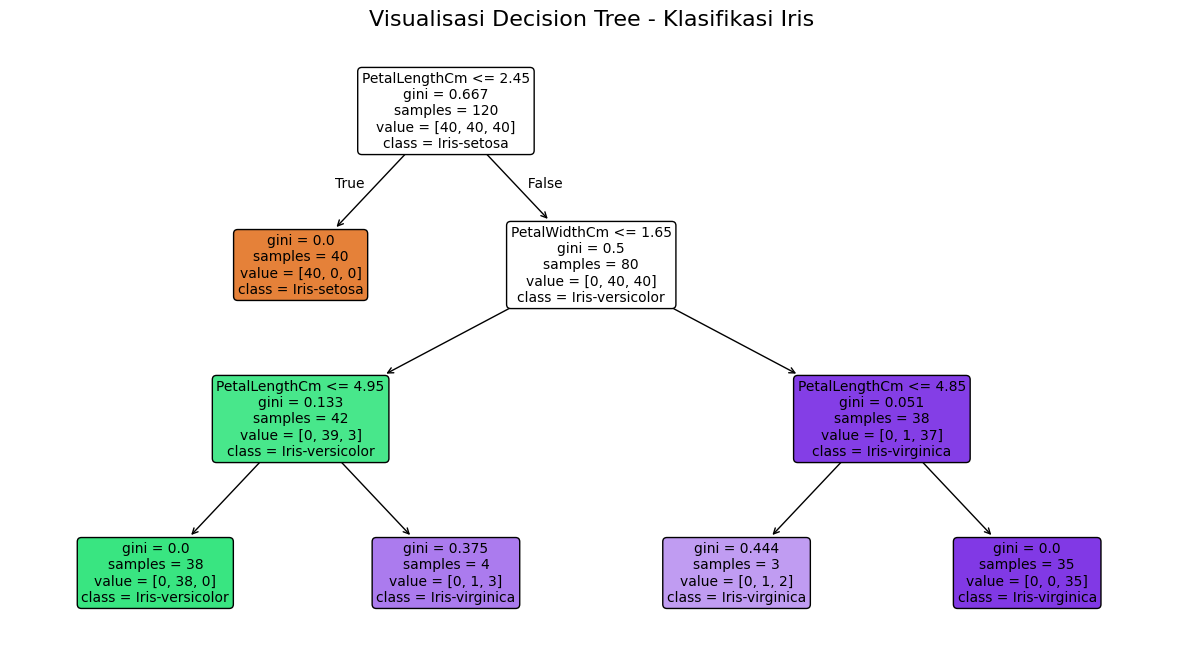

In [17]:
# Visualisasi model
plt.figure(figsize=(15, 8))
plot_tree(
    dt_iris,
    feature_names=feature_cols,
    class_names=species_classes,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree - Klasifikasi Iris", fontsize=16)
plt.show()